# OSEMN

According to a popular model, the elements of data science are:

* Obtaining data
* Scrubbing data
* Exploring data
* Modeling data
* iNterpreting data

and hence the acronym OSEMN, pronounced as “Awesome”.

We will start with the **O**, and let's have a quick look at what it all boils down to:

In [17]:
# O: obtaining data
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

In [18]:
# S: scrubbing data
import numpy as np
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables
# this is not real scrubbing, rather a simple operation to better handle the data

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


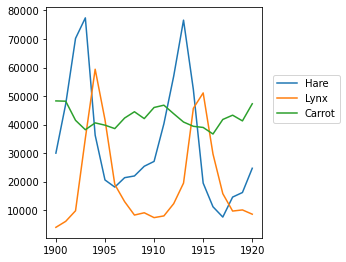

In [19]:
# E: exploring data
!cat data/populations.txt

from matplotlib import pyplot as plt
%matplotlib inline

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

In [20]:
# M: modeling

By plotting the data a clear (and reasonable) correlations between pray and predator becomes evident.

 - How can it be quantified?
 - Is that statistical significant?
 - What about the correlation between carrots and hares?
 
 We will deal with data modeling in few weeks, when we will learn to fit the data.

In [21]:
# N: interpreting

Finding correlations in data is one of the main goals of data science, though that is not the end of the story: as this interesting [site](http://tylervigen.com/spurious-correlations) demonstrates, **correlations does not imply causation**.

**Optional exercise**: write an algorithm that determines and quantifies a correlation between two time series. Use as an example the hare-lynx-carrot dataset.

## Obtaining and processing data

Accessing data may not be as easy as it seems. The previous example, where the data is stored on your own machine, represents the simplest (but alas, less common) case. Data is usually stored on remote machines, which can be either *publicly accessible* (everyone can access the data, even without credentials) rather than *private*. In the case of the former, things may be straightforward, whereas in the latter case you need to worry about a few things.

In both cases, depending on the size of the dataset, the managment of the dataset can become extremely complicated. We won't deal here with large datasets (which require a whole course *per se*), but still we should pay attention to few basic things: for instance, *it is not wise to keep (and even worse commit) data into a git repository*!

The suggestion is then to create a directory somewhere and copy the example datasets there. From a terminal:

```bash

# create a data directory in your home directory
mkdir data/

# check the content (it's empty now of course)
ls -ltr data/

# in the case you need to move there:
cd data/

# if you need to copy a file
cp data/data_original.txt data/data_copy.txt
```

### Public data

An increasingly number of institutions, reaserch centers, experiments, ... are making their data public.

A nice set of interesting datasets can be found on this [server](https://archive.ics.uci.edu/ml/datasets.php) that collects training/test data for machine learning developments. Several of those belong to physical sciences, and may be worth a look. Since they are public, you can freely download any of those. However, they usually come with a license (e.g. you won't be allowed to make profit from them), and deserve a reference in your paper, if you publish some result.

Sometimes, they are used as the input to machine learning challenges, where different groups compete to achieve the best result.

In the following, we consider a dataset from the MAGIC experiment. We will get it with the `wget` command:

In [23]:
# download the dataset and its description to the data/ directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/    

In [24]:
# read the description file. This can (and should) be done from a terminal
!cat data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

### Accessing the data without downloading the file(s)

It is possible to download and load remote files via their url from within python (and thus on a jupyter session). This is a rather powerful tool as it allows http communications, I/O streaming and so on.

Care should be put as the dataset is stored in memory.

In [25]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names'
with urllib.request.urlopen(url) as data_file:
    #print(data_file.read(300))
    for line in data_file:
        print(line)

b'1. Title of Database: MAGIC gamma telescope data 2004\n'
b'\n'
b'2. Sources:\n'
b'\n'
b'   (a) Original owner of the database:\n'
b'\n'
b'       R. K. Bock\n'
b'       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)\n'
b'       http://wwwmagic.mppmu.mpg.de\n'
b'       rkb@mail.cern.ch\n'
b'\n'
b'   (b) Donor:\n'
b'\n'
b'       P. Savicky\n'
b'       Institute of Computer Science, AS of CR\n'
b'       Czech Republic\n'
b'       savicky@cs.cas.cz\n'
b'\n'
b'   (c) Date received: May 2007\n'
b'\n'
b'3. Past Usage:\n'
b'\n'
b'   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,\n'
b'       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,\n'
b'       Vaicilius, A., Wittek W. (2004).\n'
b'       Methods for multidimensional event classification: a case study\n'
b'       using images from a Cherenkov gamma-ray telescope.\n'
b'       Nucl.Instr.Meth. A, 516, pp. 511-528.\n'
b'\n'
b'   (b) P. Savicky, E. Kotrc.\n'
b'       Experimental Stu

###  Copy data from a remote machine

Often datasets are not available on websites, but rather they are stored on some remote machine. Several tools have been developed allow you to get remote data, even from within python (e.g. [paramiko](https://www.paramiko.org/)), but it's often enough to get a local copy.

The unix `scp` command is of great help in this case. Its syntax resembles the one of the `cp` command, e.g. from a terminal:

```bash
scp username@machinename.unipd.it:/path/to/the/file/filename.* path/to/the/target/
```

The `scp` works provided that you have the necessary permissions and authorization to log in to the remote machine, and you know the location of the files within that machine. This seems trivial, but it's one of the most difficult aspects you will have to deal when trying to obtain the data.

However, it could be worse. Especially in large reaserch centers or companies, the remote machine `R` is often not accessible from "outside", meaning that it is hidden behind a firewall. In that case you may need to use to access to a *gate* machine `G` first (with very limited disk space and functionality), and only then you can connect to the machine. This also means that you cannot run the `scp` command twice to get the data.

The simplest solution is to create an `ssh` tunnel:

``` bash
ssh -L port:<address of R known to G>:22 <user at G>@<address of G> 

scp -P port <user at R>@localhost:/path/to/the/file file-name-to-be-copied .
```
**added dot above to copy to local machine(?)**

where `port` is the port number which is a number between 1025 and 65535, `R` is the machine where the files are located, `G` is the gate, and `user` is the username.

The first command redirects your local port `port` to port 22 of `R`. It could happen that the chosen port number is already in use, in that case just pick another unused port.

In summary, just getting the data could be complicated.

## Data Formats

Datasets can be stored in several different ways. Sometimes, they have formats which are application-dependent, even though more and more standards are being established.

#### Proprietary formats

In some of those cases, the format of the data is proprietary, meaning that the software house does not provide the documentation needed to read and write the data in that format. We won't cover those cases in this course, and there are a number of reasons to avoid them.

#### Open formats

In case an open, widely-accepted data formats, Python has "readers" for most of these, another reason for being the optimal programming language for data analysis. In the follwing, we will explore the most common ones.

### Text files 

Plain text files are very common, and are used for "readibility", at the price of a poor storing efficiency. [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the most common encoding.

Reading (and writing) text files in Python is straightforward:

In [30]:
file_name = "data/magic04.data"
n = 0

# mode can be specified for writing, reading or both
with open(file_name, mode = 'r') as f:
    # print-out the whole file
    # print(f.read()) 
    for line in f:
        print(n, ":")
        # print line by line
        print(line)
        # each line is a string, you need to split it yourself
        #for c in line.split(','): print("  ", c) # check the functionalities of the split() method
        n += 1
        if n > 10: break

0 :
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g

1 :
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g

2 :
162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g

3 :
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449,116.737,g

4 :
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g

5 :
51.624,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,238.098,g

6 :
48.2468,17.3565,3.0332,0.2529,0.1515,8.573,38.0957,10.5868,4.792,219.087,g

7 :
26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.456,-2.9292,0.812,237.134,g

8 :
96.2327,46.5165,4.154,0.0779,0.039,110.355,85.0486,43.1844,4.854,248.226,g

9 :
46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.875,102.251,g

10 :
62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.771,9.9144,323.094,g



Similarly, it's possible to write files to a txt file:

In [28]:
out_file_name = "data/magic04.out"

with open(out_file_name, 'a') as outfile:
    outfile.write(line + '\n') # write last line to a file

!cat data/magic04.out

62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.771,9.9144,323.094,g



### CSV files

Text files are already framed into a defined structured, in a "table-like" manner. If the values/features/attributes are separated with a comma, these files are colled "comma separated values" (CSV), even though the separator may well not be the "," symbol. It could also happen that the separator is a whitespace, or a tab character.

Python has a package to deal with those, named `csv`:

In [31]:
import csv

n = 0

with open('data/magic04.data') as data_file:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        # again note that elements of each line are treated as strings
        # if you need to convert them into numbers, you need to to that yourself
        fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist = map(float, line[:-1])
        category = line[-1]
        print(fLength, fWidth, fSize, fConc, fConc1, fAsym, fM3Long, fM3Trans, fAlpha, fDist, category)
        n += 1
        if n > 10: break

28.7967 16.0021 2.6449 0.3918 0.1982 27.7004 22.011 -8.2027 40.092 81.8828 g
31.6036 11.7235 2.5185 0.5303 0.3773 26.2722 23.8238 -9.9574 6.3609 205.261 g
162.052 136.031 4.0612 0.0374 0.0187 116.741 -64.858 -45.216 76.96 256.788 g
23.8172 9.5728 2.3385 0.6147 0.3922 27.2107 -6.4633 -7.1513 10.449 116.737 g
75.1362 30.9205 3.1611 0.3168 0.1832 -5.5277 28.5525 21.8393 4.648 356.462 g
51.624 21.1502 2.9085 0.242 0.134 50.8761 43.1887 9.8145 3.613 238.098 g
48.2468 17.3565 3.0332 0.2529 0.1515 8.573 38.0957 10.5868 4.792 219.087 g
26.7897 13.7595 2.5521 0.4236 0.2174 29.6339 20.456 -2.9292 0.812 237.134 g
96.2327 46.5165 4.154 0.0779 0.039 110.355 85.0486 43.1844 4.854 248.226 g
46.7619 15.1993 2.5786 0.3377 0.1913 24.7548 43.8771 -6.6812 7.875 102.251 g
62.7766 29.9104 3.3331 0.2475 0.1261 -33.9065 57.5848 23.771 9.9144 323.094 g


Sometimes, csv files have comments (e.g. starting with '#'), which cannot be interpreted by the reader. Tricks like:

```python
csv.reader(row for row in f if not row.startswith('#'))
```

may be useful to skip those lines.

### JSON files

JSON stands for JavaScript Object Notation, and is a format widely used for web-based resource sharing. It is very similar in structure to a Python nested dictionary. It is humand readable (then human-editable), even if readability may be difficult for complex data structures. Its use is convenient in Python, as its items can be accessed by key. Here is an example http://json.org/example:

In [33]:
%%file example.json
{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}

Overwriting example.json


In [34]:
!cat example.json

{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}


In [ ]:
import json # import the JSON module
data = json.load(open('example.json'))
print(data)

In [ ]:
# and can be parsed using standard key lookups
data['glossary']['GlossDiv']['GlossList']['GlossEntry']['GlossTerm']

### Pickle

Sometimes, you may want to save and read more complex Python data structures than int, floats and strings, as for example dictionaries, tuples, lists, or even more complex objects.

In these cases, the `pkl` format is very handful. Pickle is used for serializing and de-serializing Python object structures, also called flattening. Serialization consists of converting an object in memory to a byte stream that can be stored on disk. Later on, this character stream can then be retrieved and de-serialized back to a Python object.

There are fundamental differences between the pickle protocols and JSON (JavaScript Object Notation):

- JSON is a text serialization format (it outputs unicode text, although most of the time it is then encoded to utf-8), while pickle is a binary serialization format;

- JSON is human-readable, while pickle is not;

- JSON is interoperable and widely used outside of the Python ecosystem, while pickle is Python-specific;

- JSON, by default, can only represent a subset of the Python built-in types, and no custom classes; pickle can represent an extremely large number of Python types (many of them automatically, by clever usage of Python’s introspection facilities; complex cases can be tackled by implementing specific object APIs);

- Unlike pickle, deserializing untrusted JSON does not in itself create an arbitrary code execution vulnerability.

In [35]:
import pickle

# define the data structure
ages_dict = {'Fido' : 3, 'Laika' : 16, 'Skipper' : 10, 'Balou' : 9}

filename = "data/dog_ages.pkl"

outfile = open(filename, 'wb') # note: no filename extension. 'wb' stands for w: write and b: binary
pickle.dump(ages_dict, outfile) # "dump" the data to pkl
outfile.close() # remember to close the file

!ls data/

dog_ages.pkl  magic04.names  populations.txt
magic04.data  magic04.out    populations.txt.1


In [ ]:
# Read pickle
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

print(new_dict)

### HDF5

HDF5 is a hierarchical format often used to store complex scientific data. For instance, Matlab now saves its data to HDF5. It is particularly useful to store complex hierarchical data sets with associated metadata, for example, the results of a computer simulation experiment.

The main concepts associated with HDF5 are:

* file: container for hierachical data - serves as ‘root’ for tree
* group: a node for a tree
* dataset: array for numeric data - can be huge
* attribute: small pieces of metadata that provide additional context

Now let's create a dummy dataset:

In [ ]:
import h5py
import numpy as np
import os

# creating a HDF5 file

filename = "data/example.hdf5"

if os.path.exists(filename): # check if file exists, and if it does, delete it
    os.remove(filename)

with h5py.File(filename, 'w') as f:
    project = f.create_group('project')
    expt1 = project.create_group('expt1')
    expt2 = project.create_group('expt2')
    expt1.create_dataset('counts', (100,), dtype='i')
    expt2.create_dataset('values', (1000,), dtype='f')

    expt1['counts'][:] = np.arange(100)
    expt2['values'][:] = np.arange(1000)/10.

In [ ]:
# Read HDF5 file

with h5py.File(filename) as f:
    project = f['project']
    print(project['expt1']['counts'][:10])
    print(project['expt2']['values'][:10])

### Numpy and Pandas

Numpy provides the useful methdod `np.loadtxt()` to read a txt files, as we have seen in the introduction.

Pandas itself provides integrated and convenient tools to read and write CSV files with the `read_csv()` method of DataFrames:

In [36]:
# copy the unpacked version
#!wget https://www.dropbox.com/s/ga9wi6b40cakgae/data_000637.txt -P data/

--2022-11-16 11:43:11--  https://www.dropbox.com/s/ga9wi6b40cakgae/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/ga9wi6b40cakgae/data_000637.txt [segue]
--2022-11-16 11:43:12--  https://www.dropbox.com/s/raw/ga9wi6b40cakgae/data_000637.txt
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc70a8dfec80358f0831ffb8d9a7.dl.dropboxusercontent.com/cd/0/inline/Bw1Ql0dTl_eXX20sSdX39MZfqAB81-OGdzVOH11i7QtPjcoKmvPWGq7uHymr-ryWRdm0rB-atmNjBvHRj5rOFijQuRK3H_t-LHQwt9eDsF9jr-FTLUM6xFcdcy3Bcv1QPy1TcO3jytZT3WA5hY52cHvhh1ToQ0yNerj32DUBFmcCSw/file# [segue]
--2022-11-16 11:43:12--  https://uc70a8dfec80358f0831ffb8d9a7.dl.dropboxusercontent.com/cd/0/inline/Bw1Ql0dTl_eXX20sSdX39MZfqAB81-OGdzVOH11i7Q

In [37]:
import pandas as pd
file_name= "data/data_000637.txt"
data = pd.read_csv(file_name, nrows=10, skiprows=range(1,1))
data

HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0     1     0          123  3869200167        2374        26
1     1     0          124  3869200167        2374        27
2     1     0           63  3869200167        2553        28
3     1     0           64  3869200167        2558        19
4     1     0           64  3869200167        2760        25
5     1     0           63  3869200167        2762         4
6     1     0           61  3869200167        2772        14
7     1     0          139  3869200167        2776         0
8     1     0           62  3869200167        2774        21
9     1     0           60  3869200167        2788         7

Note that Pandas is smart enough to determine that the first row consist of the headers of each column:

In [38]:
print(data.columns)
#!cat data/data_000637.txt

Index(['HEAD', 'FPGA', 'TDC_CHANNEL', 'ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'], dtype='object')


Columns can be specified when reading the file:

In [49]:
import pandas as pd
file_name = "data/magic04.data"
data = pd.read_csv(file_name, nrows=1000, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'category'])
data

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0     28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1     31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2    162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3     23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4     75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
..        ...       ...     ...     ...     ...       ...      ...       ...   
995   20.0489    9.2926  2.4014  0.6429  0.4226    4.1464 -14.5626   10.2506   
996   13.3396   10.5628  2.1917  0.7910  0.4019  -14.8910  -2.3901   11.9001   
997   49.8521   11.4525  2.3971  0.4529  0.2305   52.6071  39.3622   -8.6905   
998   29.2688   14.2779  2.5723  0.4016  0.2021  -21.2132 -23.9344   -8.2073   
999   21.9470   20.3281  2.4864  0.4078  0.2072   12.8338  10.4007   14.8348   

      fAlpha     fDist category  
0    40.0920   81.8828        g  
1     6.3609  205.2610        g  
2    76.9600  256.7880        g  
3    10.4490  116.7370        g  
4     4.6480  356.4620        g  
..       ...       ...      ...  
995  25.8830  187.8470        g  
996  10.7959  182.9100        g  
997   6.0457  183.4950        g  
998  47.5590  102.7790        g  
999  40.4341  137.8100        g  

[1000 rows x 11 columns]

<AxesSubplot:xlabel='fLength', ylabel='fWidth'>

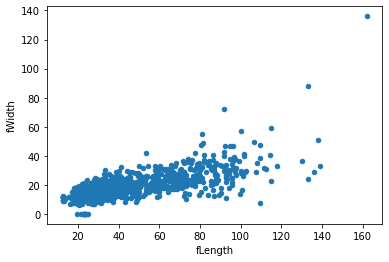

In [40]:
%matplotlib inline

data.plot.scatter("fLength", "fWidth",)

array([[<AxesSubplot:title={'center':'fAlpha'}>]], dtype=object)

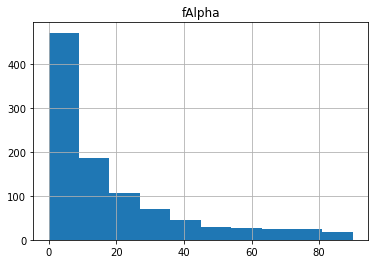

In [41]:
data.hist("fAlpha")

### ROOT

[ROOT](https://root.cern.ch/) needs a special mention. It is still nowadays, and by far, the most convenient tool to store and manage complex datasets pertaining physics experiments where "events" are recorded, in particular High Energy, Nuclear, Astro physics.

ROOT allows a nested structure, with complex data objects (classes) and references between them. For instance, a variable number of attributes/features/variables can be set on a per-event basis, which is something that other data structures are not really optimized to do.

ROOT is the C++ implementation of PAW (Fortran), which was the plotting and I/O tool for CERN experiments. Later on, ROOT evolved in a much more complete and complex tool, adding new packages like PyROOT (finally!), which provided an (almost) fully functional Python interpreter which made ROOT much more user friendly. Its core is still in C++ and uses a debatable memory management method, which is however hidden from the common user.

In spite of the many flaws, its I/O and the statistical analysis tools included are formidable.

Installing ROOT is [not trivial](https://root.cern/install/).

Fortunately, ROOT files can be opened with a non-ROOT library, [uproot](https://github.com/scikit-hep/uproot). See the [documentation](https://uproot.readthedocs.io/en/latest/basic.html).

In [46]:
#!wget https://scikit-hep.org/uproot3/examples/Zmumu.root -P data/

--2022-11-16 11:44:07--  https://scikit-hep.org/uproot3/examples/Zmumu.root
Risoluzione di scikit-hep.org (scikit-hep.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connessione a scikit-hep.org (scikit-hep.org)|185.199.108.153|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 178971 (175K) [application/octet-stream]
Salvataggio in: «data/Zmumu.root.1»

Zmumu.root.1        100%[===================>] 174,78K  --.-KB/s    in 0,07s   

2022-11-16 11:44:07 (2,41 MB/s) - «data/Zmumu.root.1» salvato [178971/178971]



In [51]:
#!pip install uproot
import uproot
events = uproot.open("data/Zmumu.root:events") # pass file name : name of the TTree

In [52]:
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Type                 | char*                    | AsStrings()
Run                  | int32_t                  | AsDtype('>i4')
Event                | int32_t                  | AsDtype('>i4')
E1                   | double                   | AsDtype('>f8')
px1                  | double                   | AsDtype('>f8')
py1                  | double                   | AsDtype('>f8')
pz1                  | double                   | AsDtype('>f8')
pt1                  | double                   | AsDtype('>f8')
eta1                 | double                   | AsDtype('>f8')
phi1                 | double                   | AsDtype('>f8')
Q1                   | int32_t                  | AsDtype('>i4')
E2                   | double                   | AsDtype('>f8')
px2                  | double                   | AsDtype('>f

<AxesSubplot:>

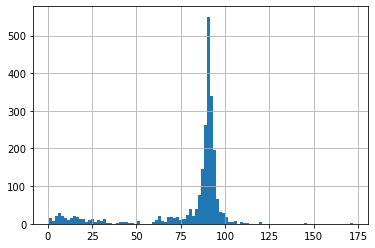

In [53]:
e1 = events['E1'].array(library="np") # get numpy array - default library uses 'awkward'

mass = events['M'].array(library="pd") # "pd" returns pandas Series
mass.hist(bins=100)

## Binary (hexadecimal) files

The raw output of sensors often consists of hexadecimal files. Information is packed in a well defined format (similarly to how floating point numbers are formatted).

In [54]:
#!wget https://www.dropbox.com/s/9nu2i111if55135/data_000637.dat -P ./data/

--2022-11-16 11:47:31--  https://www.dropbox.com/s/9nu2i111if55135/data_000637.dat
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/9nu2i111if55135/data_000637.dat [segue]
--2022-11-16 11:47:32--  https://www.dropbox.com/s/raw/9nu2i111if55135/data_000637.dat
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc275d0dbbc8ec0f246a20f94bb7.dl.dropboxusercontent.com/cd/0/inline/Bw1ZUrvs_QoPSGiz5rCLxnGDSHkoCqqIQoFWf4uiMQpVmoenEdc0VieuqN2cLOBFQBgRvjjt8EK0LGb6IcA4TB-2jgQBHWBLqS7bUBL7fuDheXYCPtkzOwzRgmO7qCLF4OTStgQLNPoZjc9cbTPPSjN9bc8uZhZIptlwawgU4C3qqw/file# [segue]
--2022-11-16 11:47:32--  https://uc275d0dbbc8ec0f246a20f94bb7.dl.dropboxusercontent.com/cd/0/inline/Bw1ZUrvs_QoPSGiz5rCLxnGDSHkoCqqIQoFWf4uiMQ

To read and process hexadecimal files in python you need to use the `"b"` option of `open` and progress along the file at step of defined length (depending on the size of the words information is packed into)

There are several tool to display and edit hex/bin files:
- from command line, using the `hexdump` command:
- online, using online tools, like the [hexed.it](https://hexed.it/) website

In [55]:
#!hexdump data/data_000637.dat # warning, the file is large

0000000 28db 9e4f cd3e 40f5 28dc 9e4f cd3e 40f7
0000010 3f3d 9e4f cd3e 407d 3fd4 9e4f cd3e 407f
0000020 591a 9e4f cd3e 407f 5945 9e4f cd3e 407d
0000030 5a8f 9e4f cd3e 4079 5b01 9e4f cd3e 4115
0000040 5ad6 9e4f cd3e 407b 5c88 9e4f cd3e 4077
0000050 5c25 9e4f cd3e 440d 5c54 9e4f cd3e 407f
0000060 5d13 9e4f cd3e 440b 5cf8 9e4f cd3e 4047
0000070 5ca4 9e4f cd3e 406f 5da1 9e4f cd3e 4515
0000080 5c6f 9e4f cd3e 440f 5ccb 9e4f cd3e 407d
0000090 5d65 9e4f cd3e 4409 5d9b 9e4f cd3e 4069
00000a0 5caf 9e4f cd3e 4413 5cab 9e4f cd3e 4071
00000b0 5cd8 9e4f cd3e 4079 5df0 9e4f cd3e 404b
00000c0 5d74 9e4f cd3e 4073 5daf 9e4f cd3e 407b
00000d0 5def 9e4f cd3e 4075 8136 9e4f cd3e 4075
00000e0 8122 9e4f cd3e 4079 8175 9e4f cd3e 4077
00000f0 81a1 9e4f cd3e 4115 80e5 9e4f cd3e 407b
0000100 81ba 9e4f cd3e 4079 87c5 9e4f cd3e 406b
0000110 881a 9e4f cd3e 4069 8955 9e4f cd3e 4065
0000120 8d09 9e4f cd3e 4075 8da9 9e4f cd3e 4069
0000130 8cf2 9e4f cd3e 4077 8e41 9e4f cd3e 4115
0000140 8e1d 9e4f cd3e 406b 8d35 9e4f cd

0029c30 1a12 9ff9 cd3e 407d 19e2 9ff9 cd3e 4077
0029c40 1a45 9ff9 cd3e 4079 1ab0 9ff9 cd3e 405f
0029c50 1a6d 9ff9 cd3e 4073 1acc 9ff9 cd3e 407d
0029c60 1b95 9ff9 cd3e 4073 1b3a 9ff9 cd3e 4079
0029c70 1b35 9ff9 cd3e 407f 48dc 9ff9 cd3e 4079
0029c80 48c2 9ff9 cd3e 407d 5d14 9ff9 cd3e 4073
0029c90 5d4a 9ff9 cd3e 405f 5d26 9ff9 cd3e 40f7
0029ca0 5d81 9ff9 cd3e 4115 5d49 9ff9 cd3e 405d
0029cb0 5e2a 9ff9 cd3e 4071 5e36 9ff9 cd3e 4059
0029cc0 6fe1 9ff9 cd3e 4065 7052 9ff9 cd3e 4407
0029cd0 7161 9ff9 cd3e 4515 6ff0 9ff9 cd3e 4409
0029ce0 711a 9ff9 cd3e 406b 70f3 9ff9 cd3e 4405
0029cf0 713d 9ff9 cd3e 440b 7177 9ff9 cd3e 4061
0029d00 7e99 9ff9 cd3e 441f 7eaf 9ff9 cd3e 4401
0029d10 7ea3 9ff9 cd3e 4071 7e8c 9ff9 cd3e 407d
0029d20 7ee5 9ff9 cd3e 4403 7f61 9ff9 cd3e 4115
0029d30 7e9a 9ff9 cd3e 4077 7ec3 9ff9 cd3e 407f
0029d40 7f36 9ff9 cd3e 4073 7f07 9ff9 cd3e 4079
0029d50 7f6f 9ff9 cd3e 4075 7fcd 9ff9 cd3e 4079
0029d60 8067 9ff9 cd3e 407b 81ae 9ff9 cd3e 407d
0029d70 aa50 9ff9 cd3e 407f aab2 9ff9 cd

003e0a0 67e1 a0c7 cd3e 4115 67fa a0c7 cd3e 4079
003e0b0 6821 a0c7 cd3e 4515 670b a0c7 cd3e 441b
003e0c0 67bc a0c7 cd3e 4023 67f5 a0c7 cd3e 407b
003e0d0 67f9 a0c7 cd3e 4415 67f3 a0c7 cd3e 401f
003e0e0 67e3 a0c7 cd3e 407f 7a6d a0c7 cd3e 4037
003e0f0 8270 a0c7 cd3e 4075 8290 a0c7 cd3e 440b
003e100 82c1 a0c7 cd3e 4115 825d a0c7 cd3e 407d
003e110 82a3 a0c7 cd3e 4413 8295 a0c7 cd3e 4055
003e120 82b2 a0c7 cd3e 4405 82b7 a0c7 cd3e 4077
003e130 8381 a0c7 cd3e 4515 8365 a0c7 cd3e 440d
003e140 8270 a0c7 cd3e 407f 8294 a0c7 cd3e 4407
003e150 840c a0c7 cd3e 40f5 8291 a0c7 cd3e 4059
003e160 83d6 a0c7 cd3e 4415 826b a0c7 cd3e 407b
003e170 834d a0c7 cd3e 4409 82a5 a0c7 cd3e 405b
003e180 83fd a0c7 cd3e 4417 83d2 a0c7 cd3e 407b
003e190 83fa a0c7 cd3e 4403 8378 a0c7 cd3e 405f
003e1a0 83fa a0c7 cd3e 4079 8374 a0c7 cd3e 405b
003e1b0 8b1d a0c7 cd3e 446b 8be6 a0c7 cd3e 4467
003e1c0 8d21 a0c7 cd3e 4515 8bd0 a0c7 cd3e 446d
003e1d0 8cef a0c7 cd3e 4469 a39d a0c7 cd3e 4069
003e1e0 a399 a0c7 cd3e 44f5 a4a1 a0c7 cd

006ae40 d2dd a28e cd3e 40a9 d354 a28e cd3e 40ad
006ae50 de6d a28e cd3e 4447 e8ef a28e cd3e 407d
006ae60 14b2 a28f cd3e 4079 14f5 a28f cd3e 442d
006ae70 1518 a28f cd3e 4073 1510 a28f cd3e 4417
006ae80 1521 a28f cd3e 4115 14b3 a28f cd3e 446f
006ae90 14ae a28f cd3e 407b 1581 a28f cd3e 4515
006aea0 14c8 a28f cd3e 441b 1525 a28f cd3e 4065
006aeb0 1557 a28f cd3e 442b 1584 a28f cd3e 4473
006aec0 151c a28f cd3e 4075 1543 a28f cd3e 4401
006aed0 14d4 a28f cd3e 407d 14b3 a28f cd3e 440d
006aee0 15a9 a28f cd3e 4053 1605 a28f cd3e 4403
006aef0 15d0 a28f cd3e 4061 15b8 a28f cd3e 440f
006af00 14f2 a28f cd3e 406f 15f0 a28f cd3e 440b
006af10 14e5 a28f cd3e 407f 166c a28f cd3e 4405
006af20 1668 a28f cd3e 404f 1605 a28f cd3e 4069
006af30 15b0 a28f cd3e 4077 167a a28f cd3e 4079
006af40 1639 a28f cd3e 406f 15d3 a28f cd3e 4071
006af50 1672 a28f cd3e 4073 1611 a28f cd3e 4075
006af60 1643 a28f cd3e 4077 36b1 a28f cd3e 4069
006af70 368d a28f cd3e 440d 368f a28f cd3e 406b
006af80 36b3 a28f cd3e 440f 382f a28f cd

0097ed0 3e25 a45a cd3e 4425 5105 a45a cd3e 4441
0097ee0 941c a45a cd3e 40a1 9464 a45a cd3e 40a5
0097ef0 a018 a45a cd3e 401f a018 a45a cd3e 4063
0097f00 a109 a45a cd3e 401d a0e2 a45a cd3e 405d
0097f10 a181 a45a cd3e 4115 a14b a45a cd3e 4061
0097f20 b2d1 a45a cd3e 4089 b9e8 a45a cd3e 4059
0097f30 ba29 a45a cd3e 405b bb34 a45a cd3e 405f
0097f40 bbe1 a45a cd3e 4115 bbb5 a45a cd3e 405d
0097f50 c74a a45a cd3e 4079 c76f a45a cd3e 407b
0097f60 c8a1 a45a cd3e 4115 c83d a45a cd3e 407d
0097f70 c876 a45a cd3e 407f cdd0 a45a cd3e 44cb
0097f80 cda7 a45a cd3e 441f cdb1 a45a cd3e 44bb
0097f90 ce41 a45a cd3e 4515 cd62 a45a cd3e 44c1
0097fa0 cdf6 a45a cd3e 44c3 ce01 a45a cd3e 44c7
0097fb0 ceac a45a cd3e 44c5 d7f7 a45a cd3e 4407
0097fc0 ede8 a45a cd3e 4081 f7e5 a45a cd3e 4403
0097fd0 f790 a45a cd3e 4077 f78d a45a cd3e 407d
0097fe0 f861 a45a cd3e 4115 f728 a45a cd3e 404f
0097ff0 f7c7 a45a cd3e 4071 f836 a45a cd3e 4073
0098000 f852 a45a cd3e 4075 0424 a45b cd3e 4401
0098010 2966 a45b cd3e 404b 2939 a45b cd

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



565b0 3a4b e87b cd3e 407d 3b44 e87b cd3e 442f
08565c0 3a73 e87b cd3e 4051 3b14 e87b cd3e 40ed
08565d0 3a23 e87b cd3e 405b 39e5 e87b cd3e 407f
08565e0 3b2a e87b cd3e 4057 3ac2 e87b cd3e 407f
08565f0 46ae e87b cd3e 403f 560a e87b cd3e 402d
0856600 5613 e87b cd3e 4073 560e e87b cd3e 440d
0856610 55c9 e87b cd3e 4033 55f1 e87b cd3e 407d
0856620 55f0 e87b cd3e 440f 56ef e87b cd3e 40f5
0856630 569d e87b cd3e 4029 5665 e87b cd3e 406f
0856640 56c1 e87b cd3e 4115 5636 e87b cd3e 4037
0856650 55cc e87b cd3e 407f 5778 e87b cd3e 4413
0856660 5784 e87b cd3e 40f3 56b8 e87b cd3e 4071
0856670 5788 e87b cd3e 407b 58dd e87b cd3e 4437
0856680 5791 e87b cd3e 406f 5745 e87b cd3e 4073
0856690 857d e87b cd3e 407d 85a7 e87b cd3e 407f
08566a0 8ed5 e87b cd3e 40b9 92f8 e87b cd3e 407f
08566b0 96a8 e87b cd3e 40eb 96c9 e87b cd3e 407f
08566c0 9721 e87b cd3e 4115 96d0 e87b cd3e 405f
08566d0 9716 e87b cd3e 40ef 96f0 e87b cd3e 4079
08566e0 96f7 e87b cd3e 407d 97fc e87b cd3e 4079
08566f0 9824 e87b cd3e 407b a596 e87b cd3e

086f640 3ba5 e920 cd3e 4435 3c41 e920 cd3e 4115
086f650 4026 e920 cd3e 4403 406b e920 cd3e 440b
086f660 4059 e920 cd3e 40ef 403a e920 cd3e 4063
086f670 4108 e920 cd3e 442f 4081 e920 cd3e 4115
086f680 4049 e920 cd3e 407f 4161 e920 cd3e 4515
086f690 4071 e920 cd3e 4401 4053 e920 cd3e 4069
086f6a0 413a e920 cd3e 440d 41ca e920 cd3e 400f
086f6b0 40b0 e920 cd3e 406f 41c2 e920 cd3e 442b
086f6c0 410e e920 cd3e 4079 4146 e920 cd3e 4433
086f6d0 412d e920 cd3e 405d 40b5 e920 cd3e 4403
086f6e0 40f3 e920 cd3e 406b 41be e920 cd3e 440f
086f6f0 40e8 e920 cd3e 407d 41f1 e920 cd3e 4433
086f700 415c e920 cd3e 4061 4194 e920 cd3e 4405
086f710 544d e920 cd3e 4073 549a e920 cd3e 4079
086f720 5541 e920 cd3e 4115 5497 e920 cd3e 405f
086f730 55c2 e920 cd3e 4403 5450 e920 cd3e 4063
086f740 546d e920 cd3e 4071 548a e920 cd3e 4059
086f750 551b e920 cd3e 4061 5521 e920 cd3e 4075
086f760 5525 e920 cd3e 407f 550e e920 cd3e 405d
086f770 54ae e920 cd3e 4077 55e2 e920 cd3e 407d
086f780 55cd e920 cd3e 405b 5551 e920 cd

0887330 6a91 e9b9 cd3e 4403 69e6 e9b9 cd3e 404f
0887340 6b01 e9b9 cd3e 4515 6ab5 e9b9 cd3e 4407
0887350 6acf e9b9 cd3e 4049 6add e9b9 cd3e 4401
0887360 7127 e9b9 cd3e 4409 7141 e9b9 cd3e 407f
0887370 7138 e9b9 cd3e 440d 71a1 e9b9 cd3e 4115
0887380 7104 e9b9 cd3e 404f 71e1 e9b9 cd3e 4515
0887390 7165 e9b9 cd3e 4403 7117 e9b9 cd3e 406b
08873a0 71ad e9b9 cd3e 440f 726d e9b9 cd3e 4033
08873b0 716f e9b9 cd3e 407d 7135 e9b9 cd3e 4405
08873c0 7177 e9b9 cd3e 4049 71fa e9b9 cd3e 4401
08873d0 7249 e9b9 cd3e 4037 71d2 e9b9 cd3e 4069
08873e0 71da e9b9 cd3e 4405 7254 e9b9 cd3e 4079
08873f0 726a e9b9 cd3e 404b 7258 e9b9 cd3e 4407
0887400 727d e9b9 cd3e 4065 728c e9b9 cd3e 440b
0887410 729d e9b9 cd3e 407b 72c7 e9b9 cd3e 4401
0887420 88dd e9b9 cd3e 405f 88f2 e9b9 cd3e 4407
0887430 8915 e9b9 cd3e 407d 8939 e9b9 cd3e 405d
0887440 8927 e9b9 cd3e 4401 8a1a e9b9 cd3e 4059
0887450 8a81 e9b9 cd3e 4515 8905 e9b9 cd3e 4405
0887460 8aac e9b9 cd3e 40f5 8a47 e9b9 cd3e 407f
0887470 8a81 e9b9 cd3e 4115 8a54 e9b9 cd

089ed10 ba47 ea64 cd3e 40ef ba6b ea64 cd3e 407d
089ed20 bad1 ea64 cd3e 4053 bae3 ea64 cd3e 407f
089ed30 bb68 ea64 cd3e 404f c9fd ea64 cd3e 4077
089ed40 d7ca ea64 cd3e 4075 da19 ea64 cd3e 4487
089ed50 d9d7 ea64 cd3e 4073 dac5 ea64 cd3e 4487
089ed60 d926 ea64 cd3e 407f daa1 ea64 cd3e 4115
089ed70 d996 ea64 cd3e 406b da17 ea64 cd3e 4077
089ed80 da88 ea64 cd3e 4069 da67 ea64 cd3e 4071
089ed90 db50 ea64 cd3e 4075 e45c ea64 cd3e 40f7
089eda0 e4a7 ea64 cd3e 4069 e468 ea64 cd3e 406f
089edb0 e601 ea64 cd3e 4115 e5c8 ea64 cd3e 406b
089edc0 041e ea65 cd3e 405f 0403 ea65 cd3e 4061
089edd0 0494 ea65 cd3e 4079 04c8 ea65 cd3e 4063
089ede0 0470 ea65 cd3e 407b 04ae ea65 cd3e 407f
089edf0 0ade ea65 cd3e 400d 0b70 ea65 cd3e 4077
089ee00 0b2d ea65 cd3e 403d 0bda ea65 cd3e 4071
089ee10 0c2c ea65 cd3e 441f 0be1 ea65 cd3e 4115
089ee20 0ae1 ea65 cd3e 4013 0c25 ea65 cd3e 4039
089ee30 0bf2 ea65 cd3e 4073 0b2b ea65 cd3e 403f
089ee40 0c58 ea65 cd3e 407b 0ba6 ea65 cd3e 4009
089ee50 0b82 ea65 cd3e 4075 0c47 ea65 cd

08b89e0 537e eb32 cd3e 4063 5617 eb32 cd3e 4427
08b89f0 52e7 eb32 cd3e 407f 5687 eb32 cd3e 4401
08b8a00 53cf eb32 cd3e 4079 56c1 eb32 cd3e 4515
08b8a10 5646 eb32 cd3e 4403 5661 eb32 cd3e 40f1
08b8a20 53dc eb32 cd3e 407d 5704 eb32 cd3e 4427
08b8a30 56ab eb32 cd3e 4069 570c eb32 cd3e 4401
08b8a40 5671 eb32 cd3e 406f 57c9 eb32 cd3e 44ff
08b8a50 579b eb32 cd3e 4403 57c2 eb32 cd3e 406b
08b8a60 5713 eb32 cd3e 4405 72ef eb32 cd3e 442f
08b8a70 72ed eb32 cd3e 4427 73ef eb32 cd3e 4401
08b8a80 7464 eb32 cd3e 4483 7441 eb32 cd3e 4515
08b8a90 7375 eb32 cd3e 442b 7426 eb32 cd3e 4047
08b8aa0 7412 eb32 cd3e 4425 b539 eb32 cd3e 4079
08b8ab0 b539 eb32 cd3e 407f b6c1 eb32 cd3e 4115
08b8ac0 b613 eb32 cd3e 407b b681 eb32 cd3e 407d
08b8ad0 c907 eb32 cd3e 4063 cc23 eb32 cd3e 40f7
08b8ae0 cc5a eb32 cd3e 4077 cc81 eb32 cd3e 4115
08b8af0 cc4e eb32 cd3e 4047 cc3d eb32 cd3e 4079
08b8b00 cc9a eb32 cd3e 4407 cc71 eb32 cd3e 40f5
08b8b10 ccad eb32 cd3e 407d cd17 eb32 cd3e 40f3
08b8b20 ccec eb32 cd3e 4027 ccdb eb32 cd

08d5f20 1481 ec01 cd3e 4515 1415 ec01 cd3e 4423
08d5f30 14c1 ec01 cd3e 4115 143d ec01 cd3e 406b
08d5f40 1457 ec01 cd3e 4425 1528 ec01 cd3e 40f7
08d5f50 1504 ec01 cd3e 4057 1393 ec01 cd3e 4439
08d5f60 1491 ec01 cd3e 4069 13dc ec01 cd3e 4409
08d5f70 14d2 ec01 cd3e 4421 1506 ec01 cd3e 4427
08d5f80 14a9 ec01 cd3e 4435 148a ec01 cd3e 4405
08d5f90 1484 ec01 cd3e 443b 1548 ec01 cd3e 4401
08d5fa0 1b91 ec01 cd3e 443b 1b8d ec01 cd3e 4075
08d5fb0 1b95 ec01 cd3e 4077 1ca1 ec01 cd3e 4115
08d5fc0 1c4e ec01 cd3e 4071 1c75 ec01 cd3e 407b
08d5fd0 1c8b ec01 cd3e 4073 1cee ec01 cd3e 407d
08d5fe0 2804 ec01 cd3e 4061 2854 ec01 cd3e 4047
08d5ff0 28ea ec01 cd3e 40d9 2898 ec01 cd3e 4019
08d6000 28ce ec01 cd3e 4063 2921 ec01 cd3e 4115
08d6010 2959 ec01 cd3e 4045 28ec ec01 cd3e 406f
08d6020 292f ec01 cd3e 401f 2984 ec01 cd3e 4023
08d6030 2942 ec01 cd3e 401d 47f9 ec01 cd3e 407d
08d6040 4814 ec01 cd3e 4063 486d ec01 cd3e 407b
08d6050 496d ec01 cd3e 4075 4978 ec01 cd3e 4079
08d6060 4902 ec01 cd3e 405d 49ad ec01 cd

08f2580 d5f5 ece8 cd3e 443f d628 ece8 cd3e 4443
08f2590 e077 ece8 cd3e 40bd e1c9 ece8 cd3e 40bd
08f25a0 e6ee ece8 cd3e 4093 e8e9 ece8 cd3e 4419
08f25b0 e8f8 ece8 cd3e 441b e948 ece8 cd3e 4047
08f25c0 e8e1 ece8 cd3e 407d e971 ece8 cd3e 4427
08f25d0 e8e8 ece8 cd3e 407f ea89 ece8 cd3e 441d
08f25e0 eab2 ece8 cd3e 4063 eac1 ece8 cd3e 4515
08f25f0 ea81 ece8 cd3e 441f eac1 ece8 cd3e 4115
08f2600 ea8e ece8 cd3e 4079 eaa7 ece8 cd3e 406b
08f2610 ea79 ece8 cd3e 407d eaa5 ece8 cd3e 407f
08f2620 0146 ece9 cd3e 4053 0209 ece9 cd3e 404f
08f2630 022b ece9 cd3e 4049 0663 ece9 cd3e 4079
08f2640 0793 ece9 cd3e 407f 07a4 ece9 cd3e 407d
08f2650 1d8b ece9 cd3e 409d 1e34 ece9 cd3e 409b
08f2660 1d85 ece9 cd3e 409f 5dd0 ece9 cd3e 440b
08f2670 5dba ece9 cd3e 405f 5e63 ece9 cd3e 4409
08f2680 5dd2 ece9 cd3e 406f 5edc ece9 cd3e 440d
08f2690 5f81 ece9 cd3e 4515 5f5b ece9 cd3e 4407
08f26a0 9d1c ece9 cd3e 407b 9d1c ece9 cd3e 407d
08f26b0 9d5c ece9 cd3e 407f b7f1 ece9 cd3e 4447
08f26c0 bb8a ece9 cd3e 4413 bb8d ece9 cd

0914700 127c edf6 cd3e 407f 12ce edf6 cd3e 4073
0914710 1352 edf6 cd3e 4079 12e4 edf6 cd3e 4075
0914720 17da edf6 cd3e 407f 195c edf6 cd3e 407f
0914730 3aba edf6 cd3e 40f7 3b82 edf6 cd3e 44e3
0914740 42cc edf6 cd3e 400f 42eb edf6 cd3e 405b
0914750 42ad edf6 cd3e 4407 4297 edf6 cd3e 4027
0914760 42f6 edf6 cd3e 407d 43a1 edf6 cd3e 4515
0914770 42cc edf6 cd3e 4403 4387 edf6 cd3e 4013
0914780 4341 edf6 cd3e 405f 4381 edf6 cd3e 4115
0914790 42e8 edf6 cd3e 4023 43d3 edf6 cd3e 4073
09147a0 42fb edf6 cd3e 4405 4351 edf6 cd3e 40ed
09147b0 43cb edf6 cd3e 400d 42a9 edf6 cd3e 407f
09147c0 437d edf6 cd3e 4409 4348 edf6 cd3e 4021
09147d0 43b4 edf6 cd3e 406f 441c edf6 cd3e 401d
09147e0 437c edf6 cd3e 4079 43b6 edf6 cd3e 440b
09147f0 4426 edf6 cd3e 4079 4396 edf6 cd3e 4401
0914800 43d5 edf6 cd3e 407b 4411 edf6 cd3e 4407
0914810 663e edf6 cd3e 443f 65b8 edf6 cd3e 406b
0914820 6652 edf6 cd3e 4437 8b8a edf6 cd3e 4077
0914830 9490 edf6 cd3e 4437 9494 edf6 cd3e 4409
0914840 9501 edf6 cd3e 4515 94cf edf6 cd

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



The following is an example from data collected from an FPGA implementing a TDC. Relevant infomation are the coordinates of the TDC channels and their time measurements:

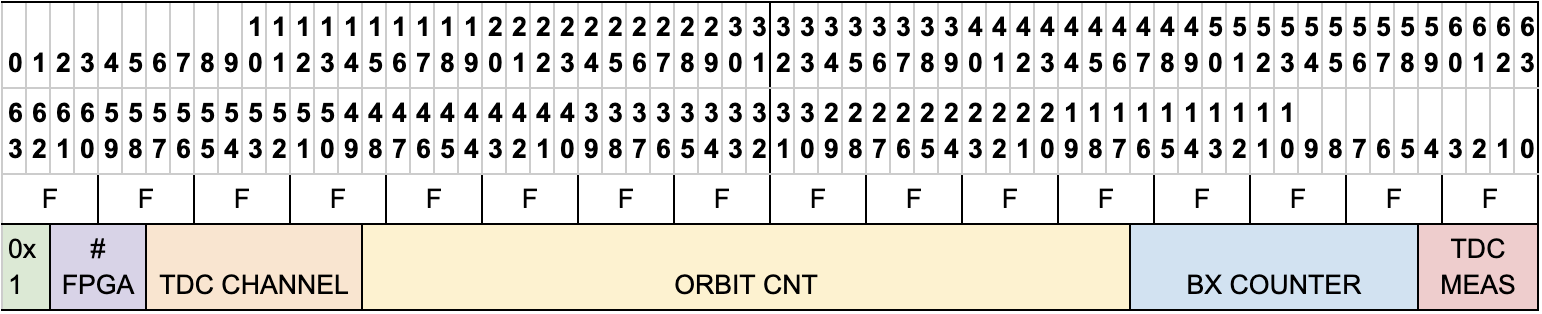

In [56]:
from IPython.display import Image
Image("images/data_format.png")

In [57]:
import struct, time

data = {}
columns = ['HEAD', 'FPGA', 'CHANNEL', 'ORBIT_CNT', 'BX_CNT', 'TDC_MEAS']
df = pd.DataFrame({}, columns=columns)

with open('data/data_000637.dat', 'rb') as file:
    file_content = file.read()
    word_counter = 0
    word_size = 8 # size of the word in bytes
    for i in range(0, len(file_content), word_size):
        word_counter += 1
        if word_counter > 10: break
        word = struct.unpack('<q', file_content[i : i + word_size])[0] # get an 8-byte word
        head     = (word >> 62) & 0x3
        fpga     = (word >> 58) & 0xF
        tdc_chan = (word >> 49) & 0x1FF
        orb_cnt  = (word >> 17) & 0xFFFFFFFF
        bx       = (word >> 5 ) & 0xFFF
        tdc_meas = (word >> 0 ) & 0x1F
        #if i == 0: print ('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format('HEAD', 'FPGA', 'CHANNEL', 'ORBIT_CNT', 'BX_CNT', 'TDC_MEAS'))
        #print('{0}\t{1}\t{2}\t{3}\t{4}\t{5}'.format(head, fpga, tdc_chan, orb_cnt, bx, tdc_meas))
        entry = {'HEAD' : head, 'FPGA' : fpga, 'CHANNEL' : tdc_chan, 'ORBIT_CNT' : orb_cnt, 'BX_CNT' : bx, 'TDC_MEAS' : tdc_meas}
        df = df.append(entry, ignore_index=True)

df

/tmp/ipykernel_5333/3017002910.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(entry, ignore_index=True)
/tmp/ipykernel_5333/3017002910.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(entry, ignore_index=True)
/tmp/ipykernel_5333/3017002910.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(entry, ignore_index=True)
/tmp/ipykernel_5333/3017002910.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(entry, ignore_index=True)
/tmp/ipykernel_5333/3017002910.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

HEAD FPGA CHANNEL   ORBIT_CNT BX_CNT TDC_MEAS
0    1    0     122  3869200167   2374       27
1    1    0     123  3869200167   2374       28
2    1    0      62  3869200167   2553       29
3    1    0      63  3869200167   2558       20
4    1    0      63  3869200167   2760       26
5    1    0      62  3869200167   2762        5
6    1    0      60  3869200167   2772       15
7    1    0     138  3869200167   2776        1
8    1    0      61  3869200167   2774       22
9    1    0      59  3869200167   2788        8